# Examples - Array - Use Dask.array to generate task graphs
https://gist.github.com/mrocklin/b61f795004ec0a70e43de350e453e97e

## Dask.array looks and feels like NumPy

In [1]:
import numpy as np
import dask.array as da 

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
x = da.arange(10, chunks=5)
x

dask.array<arange, shape=(10,), dtype=int64, chunksize=(5,)>

In [3]:
x.chunks

((5, 5),)

In [4]:
x.compute()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
type(x.compute())

numpy.ndarray

## 1D array of ones

In [6]:
x = da.ones(15, chunks=(5,))

In [7]:
x.chunks

((5, 5, 5),)

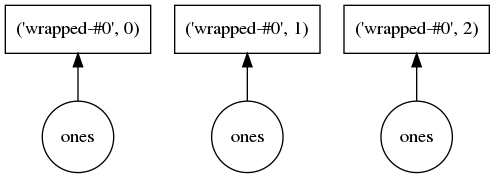

In [8]:
x.visualize()

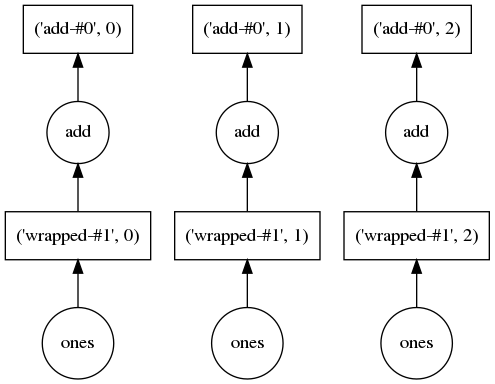

In [9]:
(x + 1).visualize()

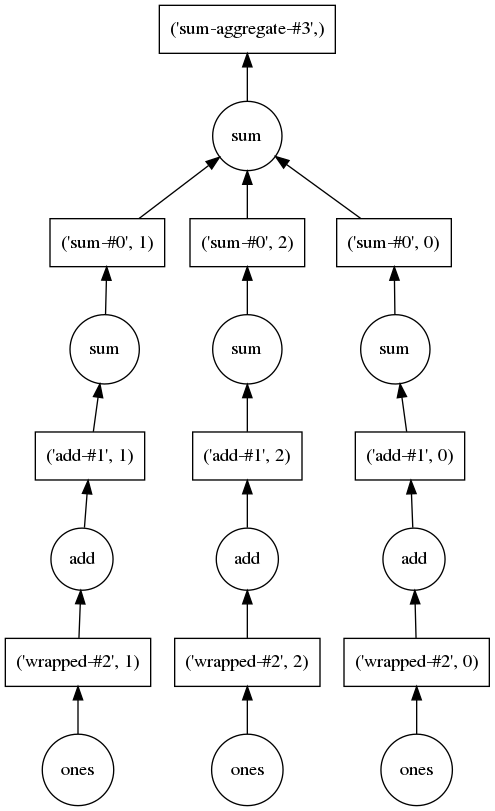

In [10]:
(x + 1).sum().visualize()

## 2d array yields more interesting graphs

In [11]:
x = da.ones((15, 15), chunks=(5, 5))
x.chunks

((5, 5, 5), (5, 5, 5))

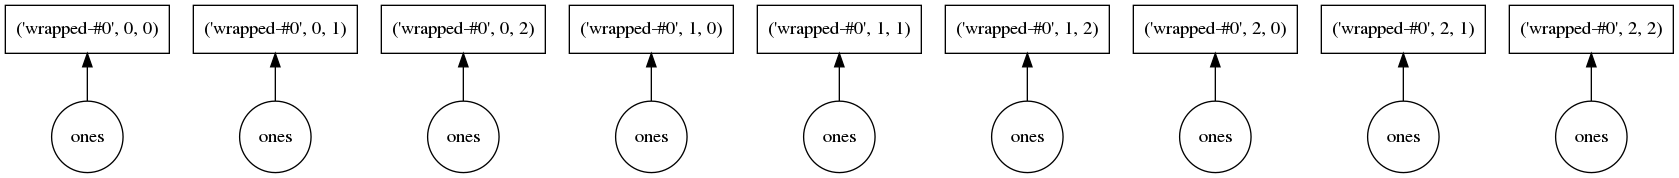

In [12]:
x.visualize()

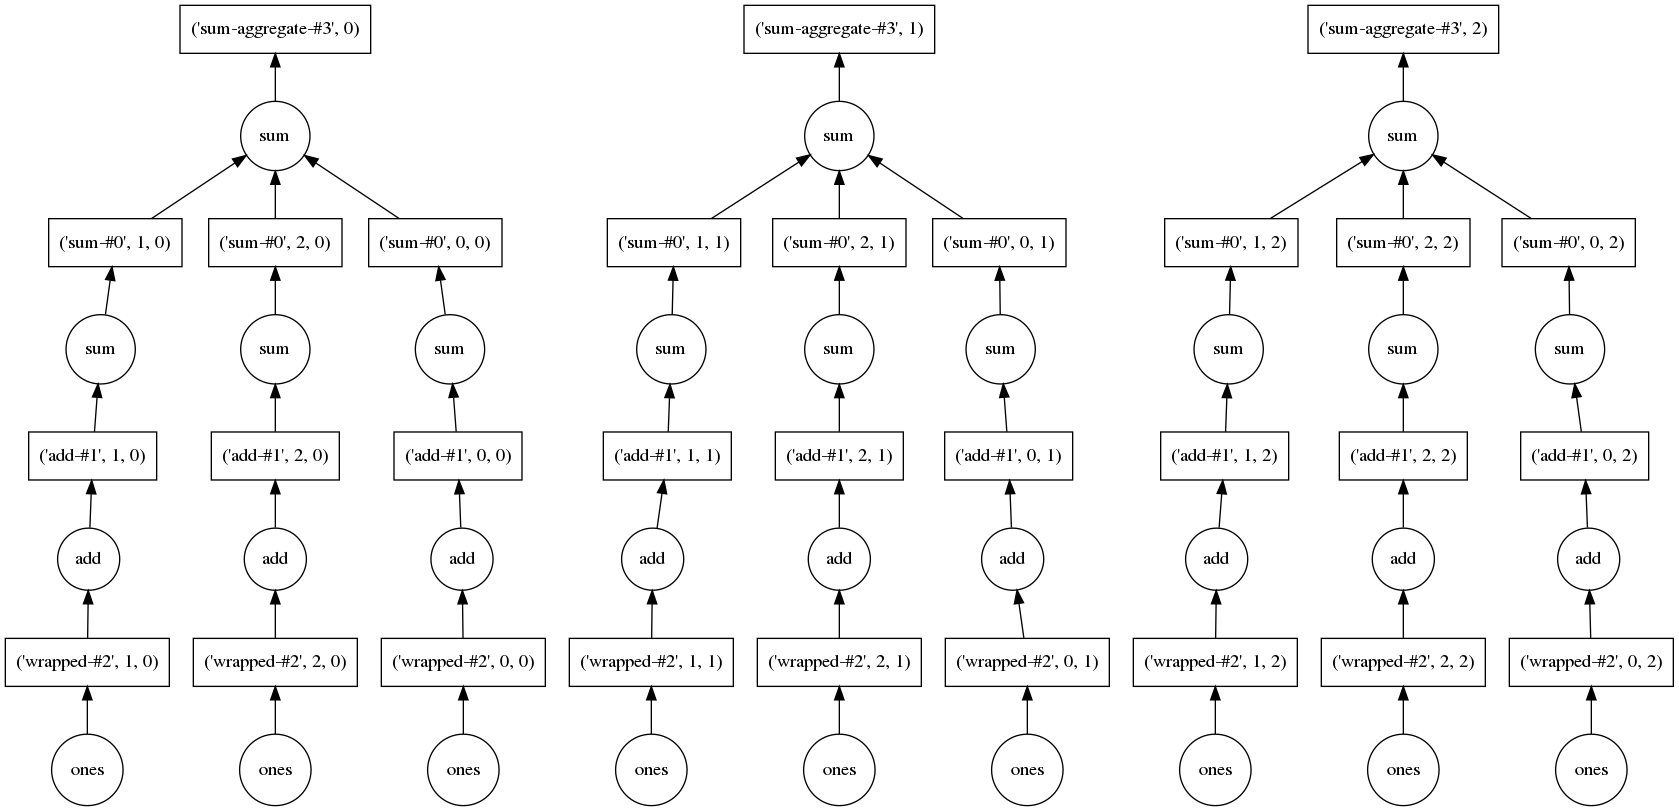

In [13]:
(x + 1).sum(axis=0).visualize()

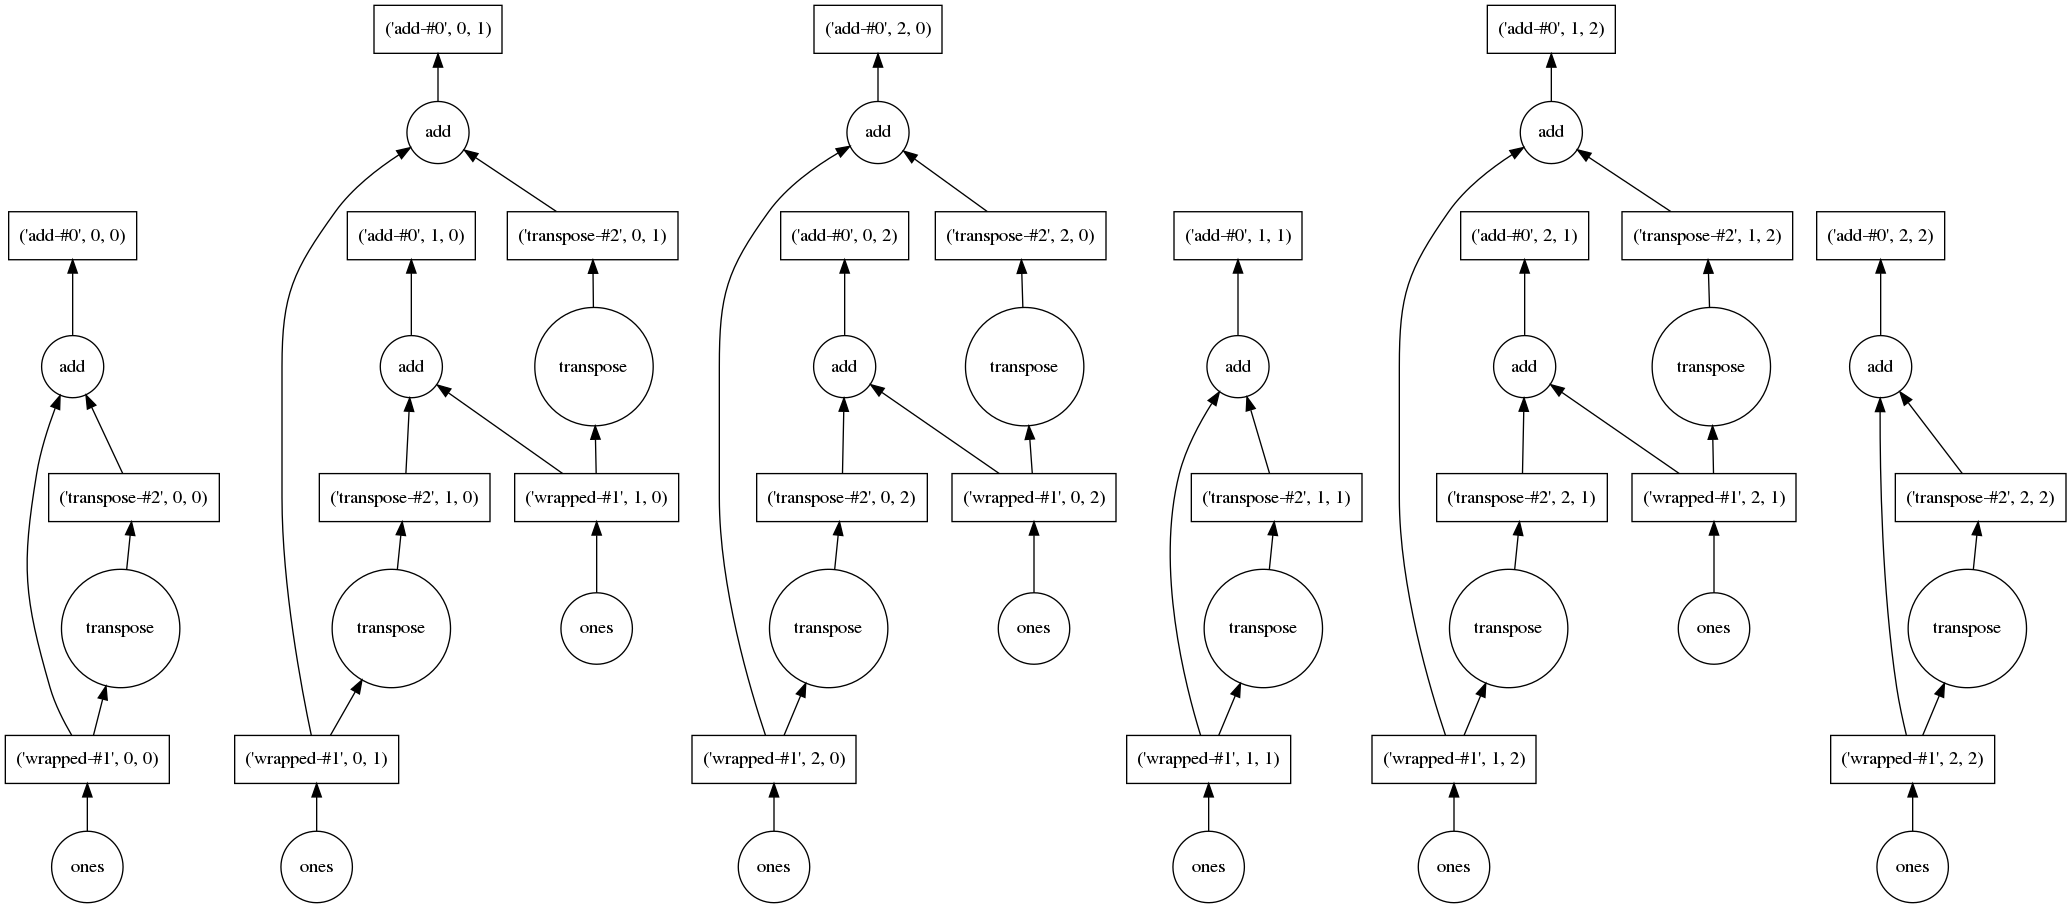

In [14]:
# this one is fun to guess before you render it to the screen
(x + x.T).visualize()

In [ ]:
# Now we just start showing off
(x.dot(x.T)).visualize()

In [ ]:
# Now we just start showing off
(x.dot(x.T + 1)).visualize()

In [ ]:
# Now we just start showing off
(x.dot(x.T + 1) - x.mean(axis=0)).visualize()

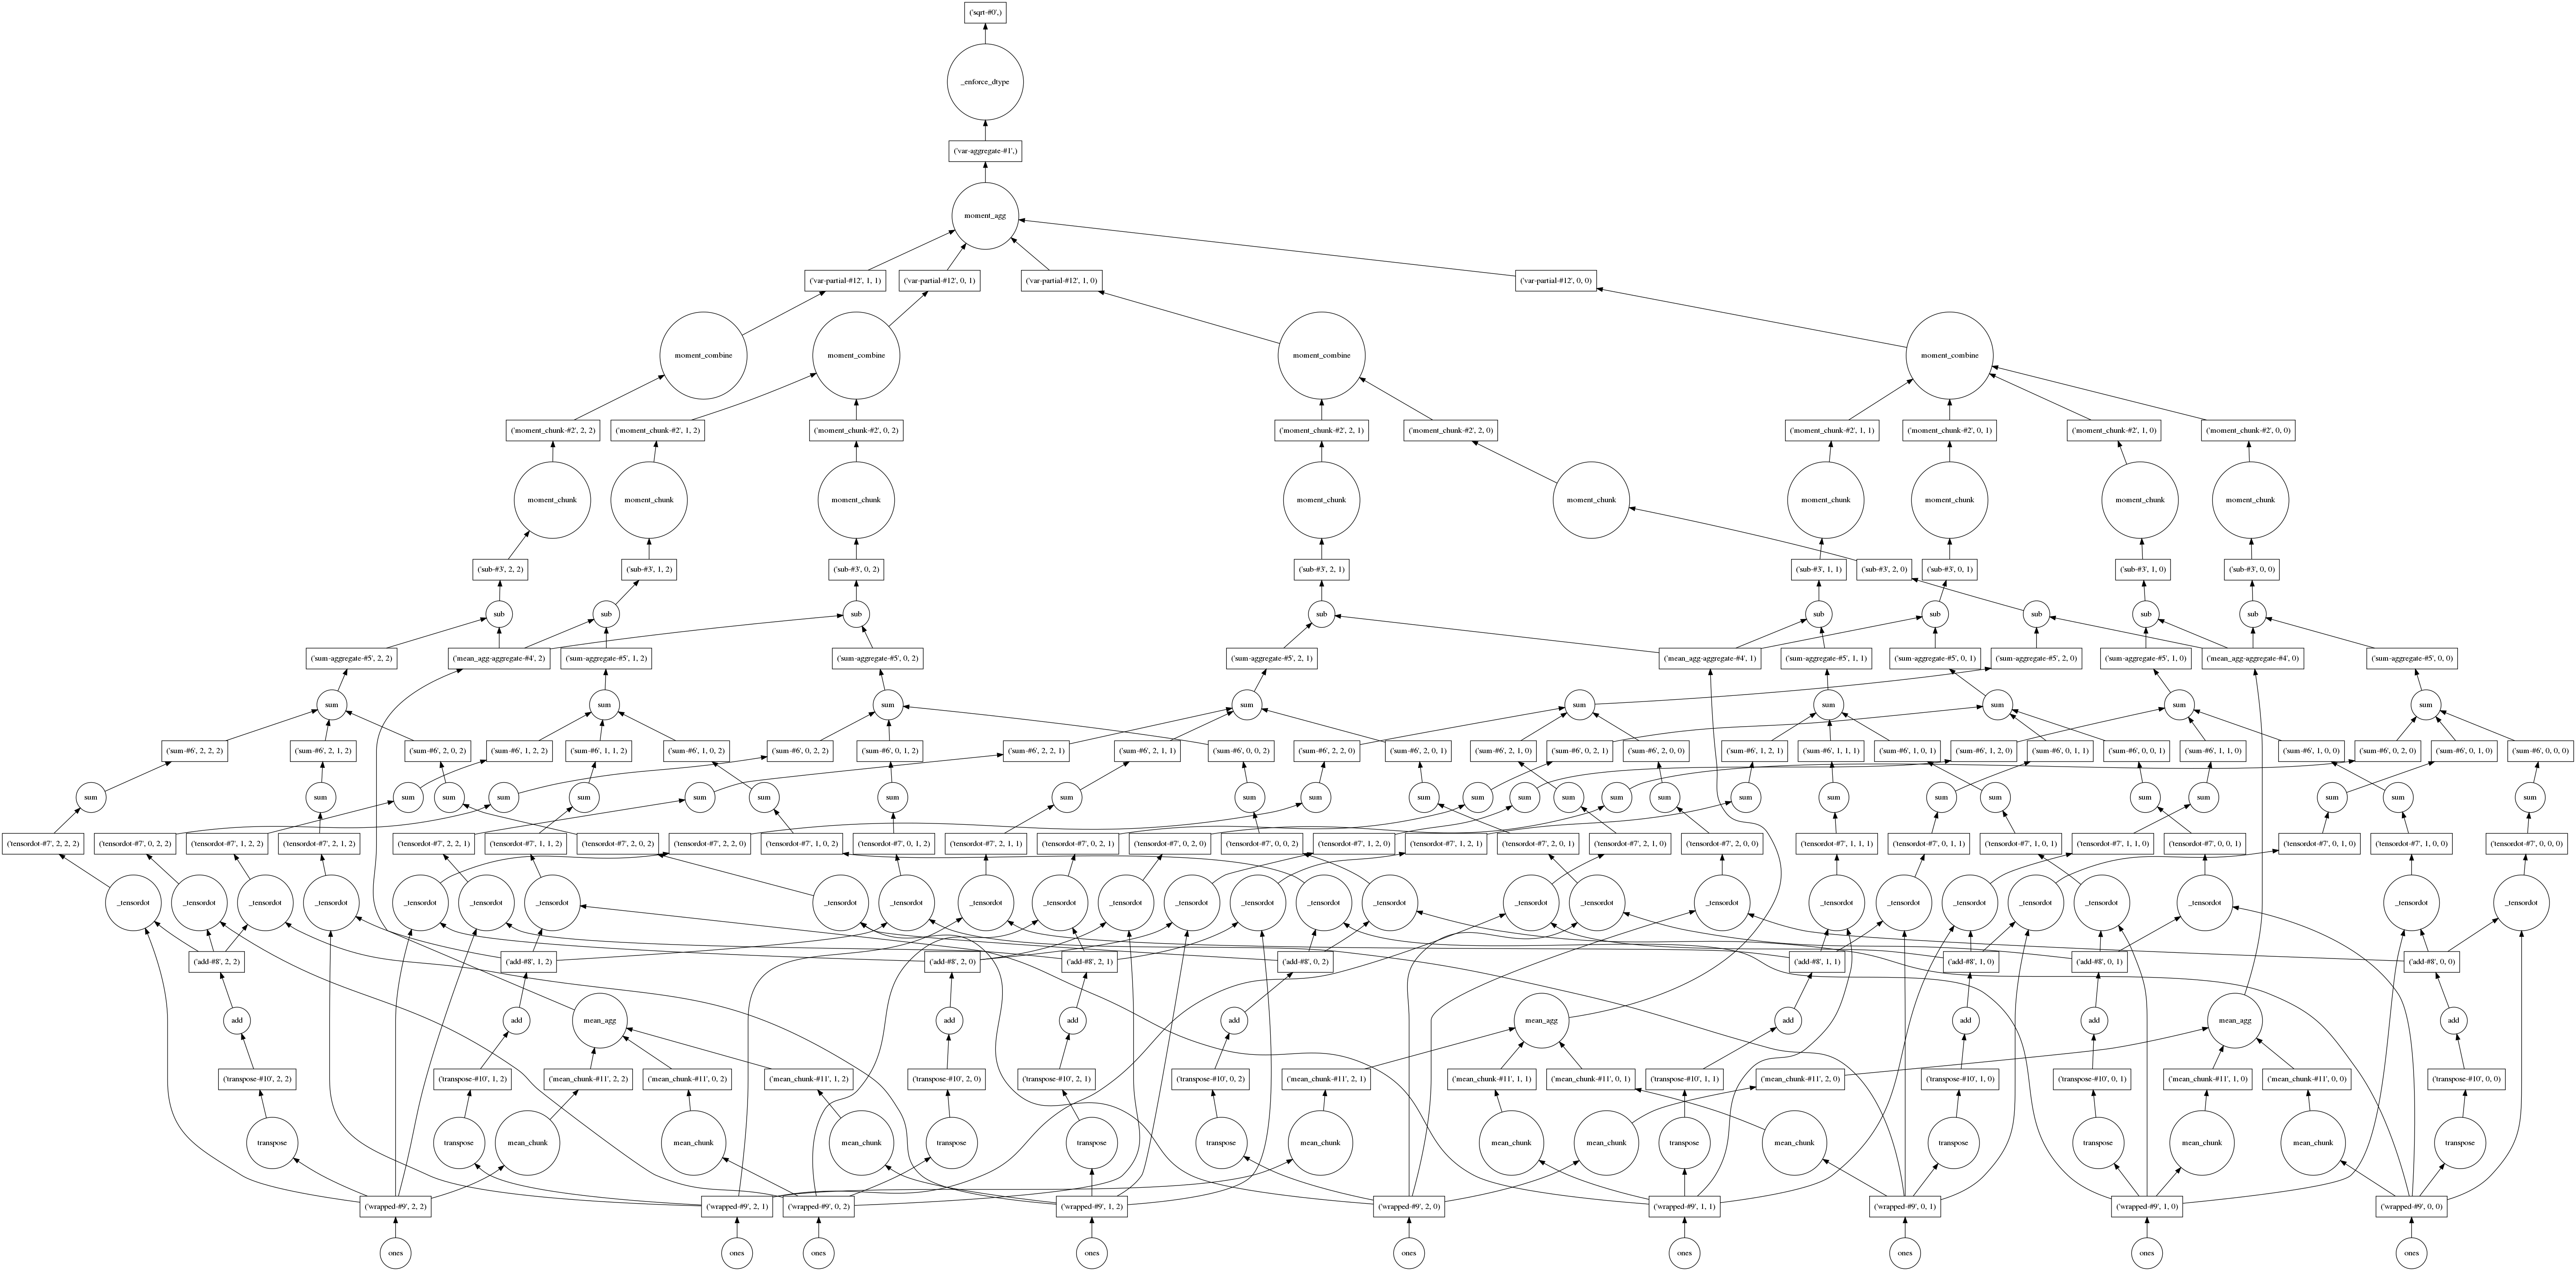

In [18]:
# Now we just start showing off
(x.dot(x.T + 1) - x.mean(axis=0)).std().visualize()

In [19]:
# This actually runs the computation, sending threads through the full graph, executing all of the circles to produce our final result
%time (x.dot(x.T + 1) - x.mean(axis=0)).std().compute()

CPU times: user 46.2 ms, sys: 8.37 ms, total: 54.6 ms
Wall time: 59.7 ms


0.0